In [ ]:
from tensorflow.compat.v1 import ConfigProto 
from tensorflow.compat.v1 import InteractiveSession 

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
train_path  = "/Users/user01/Desktop/Dataset/train/"
test_path   = "/Users/user01/Desktop/Dataset/test/"

In [ ]:
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS =30
BATCH_SIZE =256
TEST_SIZE = 256
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

## Working on the files

In [ ]:
# Make imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet  import preprocess_input, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D
import keras
#import tensorflow as tfM
import tensorflow
from tensorflow import keras
from tensorflow.keras.callbacks import CSVLogger

import pandas as pd
import numpy as np
import os
import time
import shutil
import glob
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#!pip install openpyxl

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    shear_range=0.2)
train = train_data_gen.flow_from_directory(directory=train_path, target_size=(224,224))

Found 3228 images belonging to 3 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test = test_data_gen.flow_from_directory(directory=test_path, target_size=(224,224), shuffle=False)

Found 807 images belonging to 3 classes.


## Visualize the data

In [ ]:
t_img, label = train.next()
test_img, test_label= test.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


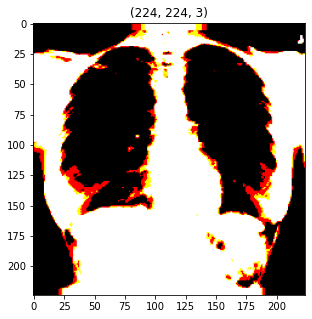

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


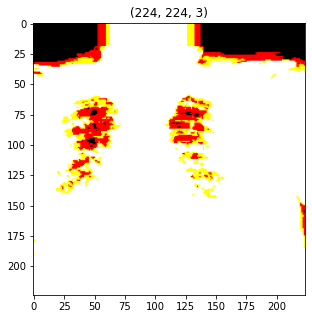

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


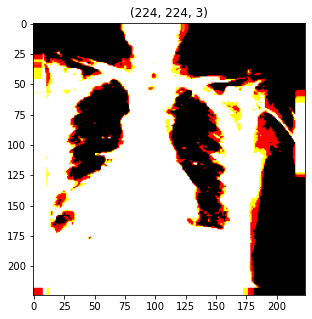

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


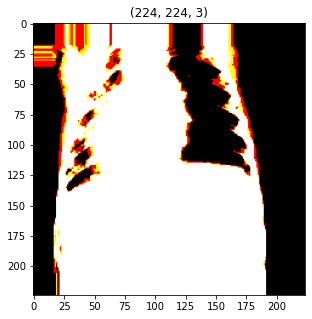

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


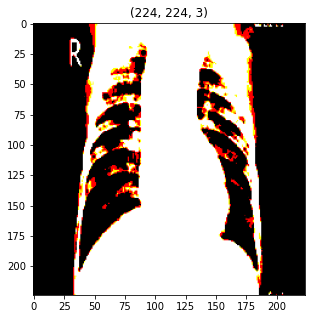

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


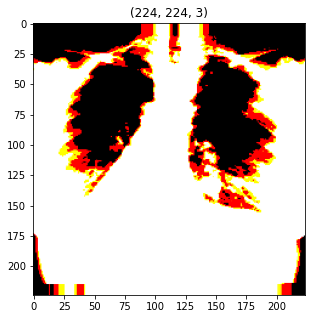

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


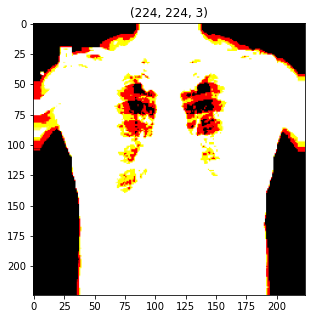

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


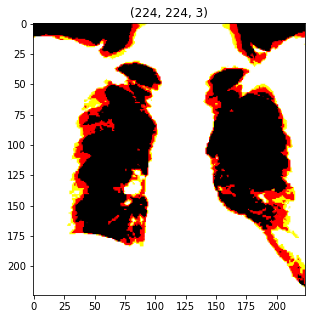

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


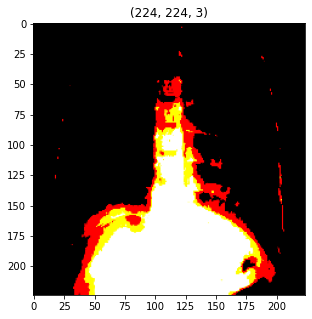

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


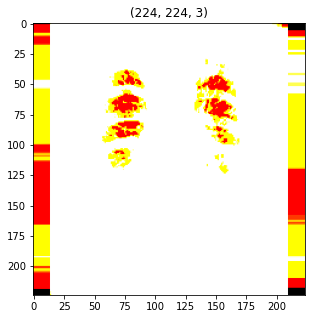

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


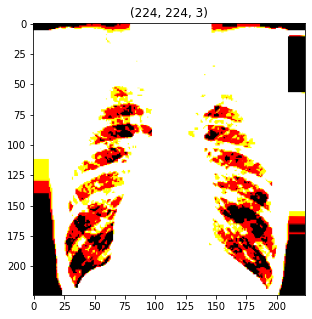

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


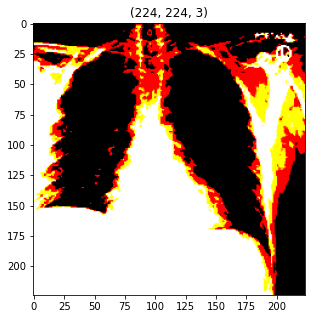

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


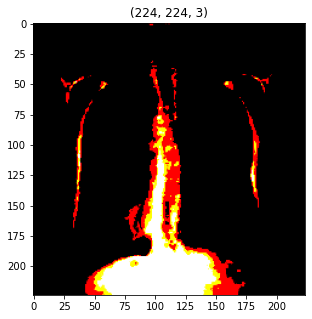

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


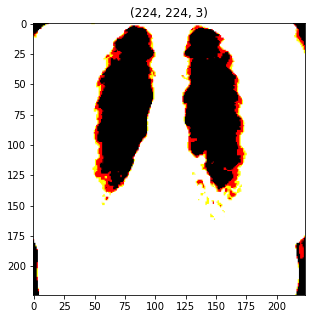

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


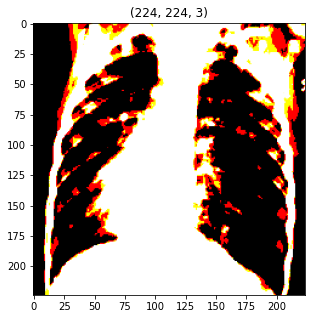

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


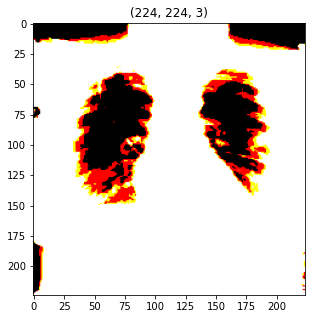

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


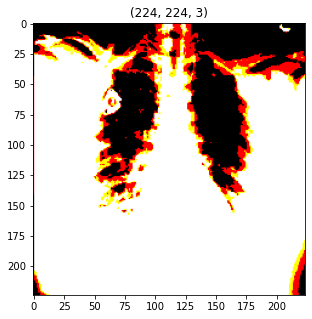

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


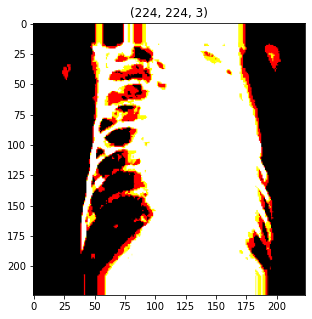

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


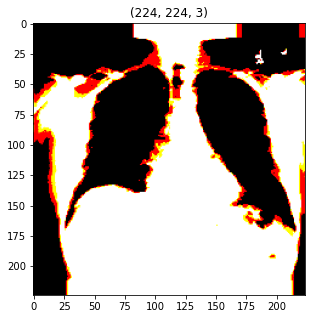

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


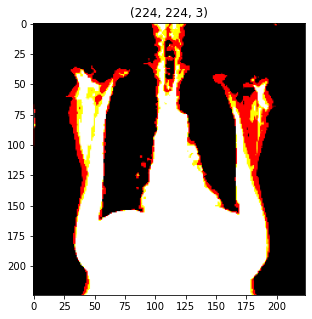

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


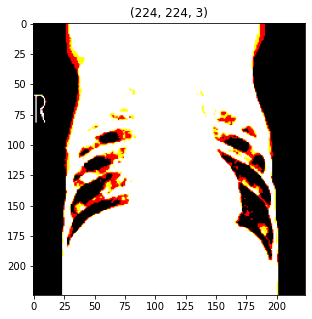

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


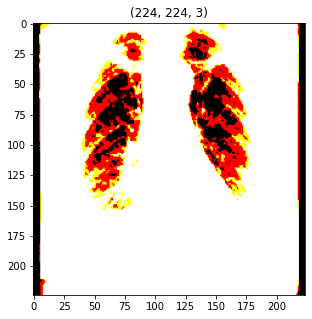

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


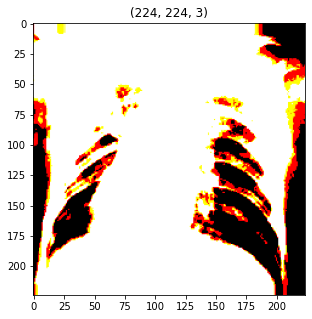

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


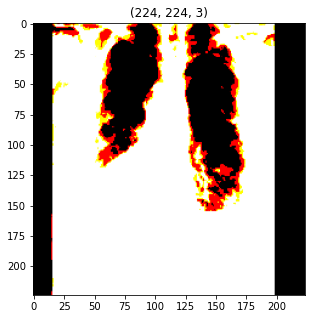

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


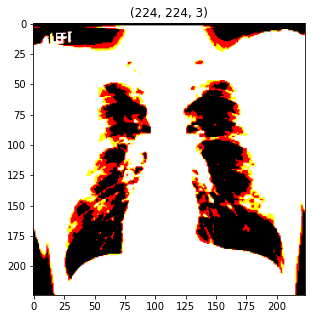

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


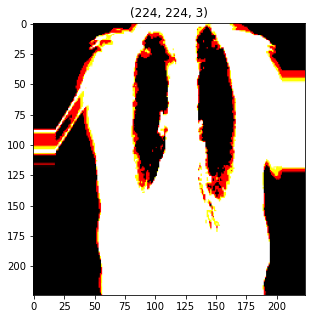

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


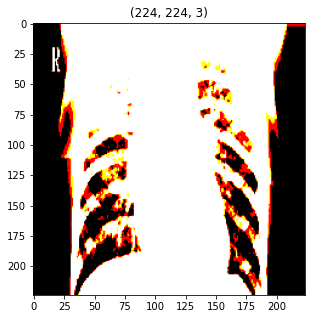

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


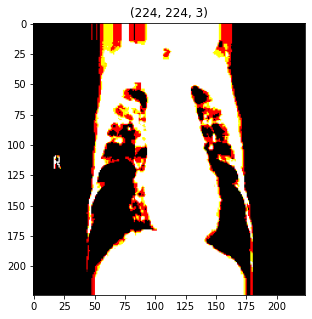

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


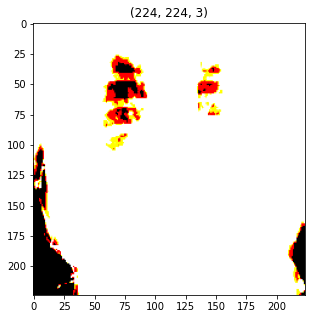

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


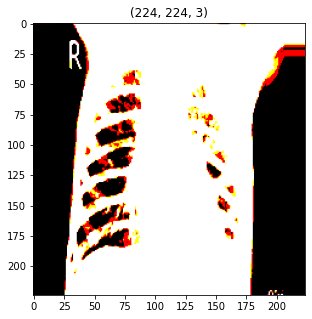

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


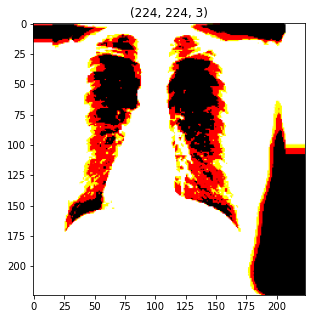

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


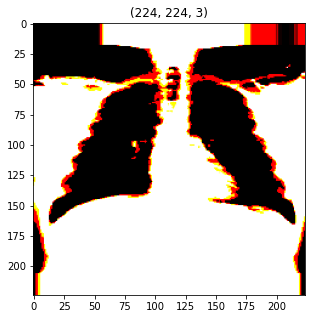

In [ ]:
# function when called will plot the images

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  for im,l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

# function call to plot the images

plotImages(t_img, label)

## EfficientB0 as the pretrained base

In [ ]:
base_efficient  = EfficientNetB0(weights='imagenet', input_shape=(224,224,3), include_top=False)

# We won't train all parameters again
for layer in base_efficient.layers:
  layer.trainable = False

x = base_efficient.output
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
#x = Dropout(0.2)(x)
predictions = Dense(3, activation='softmax')(x)

# Creating our model
model = Model(inputs=base_efficient.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [ ]:
csv_logger = CSVLogger('training_log.csv')

In [ ]:
start_time = time.time()
hist_efficient = model.fit(train, steps_per_epoch=len(train.filenames) // BATCH_SIZE, epochs=30, validation_data=test, validation_steps=len(test.filenames) //BATCH_SIZE, callbacks=[csv_logger])
elapsed_time = time.time() - start_time

Epoch 1/30
12/12 [==============================] - 13s 420ms/step - loss: 2.3262 - accuracy: 0.6094 - val_loss: 2.1207 - val_accuracy: 0.3958
Epoch 2/30
12/12 [==============================] - 4s 316ms/step - loss: 0.6095 - accuracy: 0.8125 - val_loss: 1.3640 - val_accuracy: 0.4896
Epoch 3/30
12/12 [==============================] - 4s 316ms/step - loss: 0.4300 - accuracy: 0.8620 - val_loss: 0.2970 - val_accuracy: 0.9062
Epoch 4/30
12/12 [==============================] - 4s 334ms/step - loss: 0.2992 - accuracy: 0.8842 - val_loss: 0.1382 - val_accuracy: 0.9479
Epoch 5/30
12/12 [==============================] - 4s 318ms/step - loss: 0.2244 - accuracy: 0.8984 - val_loss: 0.0994 - val_accuracy: 0.9792
Epoch 6/30
12/12 [==============================] - 4s 314ms/step - loss: 0.2678 - accuracy: 0.8802 - val_loss: 0.1711 - val_accuracy: 0.9271
Epoch 7/30
12/12 [==============================] - 4s 318ms/step - loss: 0.2034 - accuracy: 0.9167 - val_loss: 0.2463 - val_accuracy: 0.8854
Epoch

In [ ]:
print(f"Training time: {elapsed_time}s")

Training time: 125.3250663280487s


In [ ]:
# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc * 100} %")

C:\Users\user01\anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The accuracy of your model is = 94.91945505142212 %


In [ ]:
model.save("covid-efficient")


INFO:tensorflow:Assets written to: covid-efficient\assets


C:\Users\user01\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Graph EfficientB0

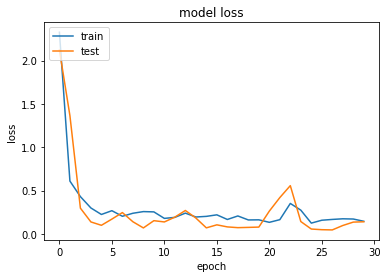

In [ ]:
plt.plot(hist_efficient.history['loss'])
plt.plot(hist_efficient.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

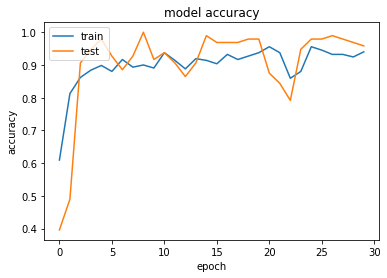

In [ ]:
plt.plot(hist_efficient.history['accuracy'])
plt.plot(hist_efficient.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

target_names = ['covid','normal', 'viral pneumonia']

def show_confusion_matrix(validations, predictions):
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 8), dpi=50)
    sns.set(font_scale=1.6)#for label size
    sns.heatmap(matrix,
                #cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=target_names,
                yticklabels=target_names,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

C:\Users\user01\anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix


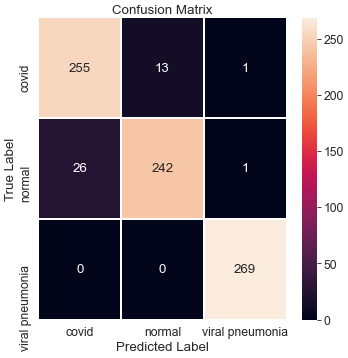

[[255  13   1]
 [ 26 242   1]
 [  0   0 269]]
Classification Report
                 precision    recall  f1-score   support

          covid       0.91      0.95      0.93       269
         normal       0.95      0.90      0.92       269
viral pneumonia       0.99      1.00      1.00       269

       accuracy                           0.95       807
      macro avg       0.95      0.95      0.95       807
   weighted avg       0.95      0.95      0.95       807



In [ ]:

Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
show_confusion_matrix(test.classes, y_pred)
confusion_matrix = confusion_matrix(test.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['covid','normal', 'viral pneumonia']
print(classification_report(test.classes, y_pred, target_names=target_names))


In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = covid

The chances of image being Covid is : 63.374847173690796 percent


The chances of image being Normal is : 36.623403429985046 percent

The chances of image being Viral Pneumonia is : 0.0017550471966387704 percent


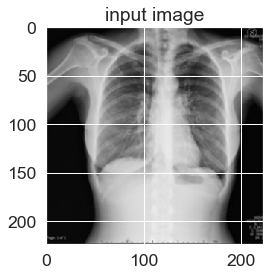

In [ ]:
# path for that new image.

path = "/Users/user01/Desktop/COVID-19.png"
# you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)
class_type = {0:'covid', 1:'normal', 2:'viral pneumonia'}
res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
#print(f"The chances of image being Lung Opacity is : {model.predict(img)[0][1]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")
print()
print(f"The chances of image being Viral Pneumonia is : {model.predict(img)[0][2]*100} percent")


# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

In [ ]:
print(hist_efficient.history['accuracy'])

[0.609375, 0.8125, 0.8619791865348816, 0.8842105269432068, 0.8984375, 0.8802083134651184, 0.9166666865348816, 0.8932291865348816, 0.8999999761581421, 0.890625, 0.9375, 0.9140625, 0.8880208134651184, 0.9192708134651184, 0.9140625, 0.9036458134651184, 0.9322916865348816, 0.9166666865348816, 0.9270833134651184, 0.9375, 0.9557291865348816, 0.9375, 0.859375, 0.8802083134651184, 0.9557291865348816, 0.9453125, 0.9322916865348816, 0.9322916865348816, 0.9244791865348816, 0.9401041865348816]


In [ ]:
print(hist_efficient.history['val_accuracy'])

[0.3958333432674408, 0.4895833432674408, 0.90625, 0.9479166865348816, 0.9791666865348816, 0.9270833134651184, 0.8854166865348816, 0.9270833134651184, 1.0, 0.9166666865348816, 0.9375, 0.90625, 0.8645833134651184, 0.90625, 0.9895833134651184, 0.96875, 0.96875, 0.96875, 0.9791666865348816, 0.9791666865348816, 0.875, 0.84375, 0.7916666865348816, 0.9479166865348816, 0.9791666865348816, 0.9791666865348816, 0.9895833134651184, 0.9791666865348816, 0.96875, 0.9583333134651184]


In [ ]:
print(hist_efficient.history['loss'])

[2.3262388706207275, 0.6094630360603333, 0.4300040304660797, 0.29924631118774414, 0.22436277568340302, 0.26784732937812805, 0.20340843498706818, 0.23825573921203613, 0.25744393467903137, 0.2540968358516693, 0.17905890941619873, 0.1907920241355896, 0.23983828723430634, 0.19505085051059723, 0.20239903032779694, 0.22013527154922485, 0.16661261022090912, 0.2072208970785141, 0.16114291548728943, 0.16251954436302185, 0.13363347947597504, 0.16431468725204468, 0.35157302021980286, 0.2740795910358429, 0.12460368871688843, 0.1579037755727768, 0.16708485782146454, 0.17439936101436615, 0.17175517976284027, 0.1457890123128891]


In [ ]:
print(hist_efficient.history['val_loss'])

[2.120745897293091, 1.3639894723892212, 0.2969813048839569, 0.13819189369678497, 0.09944993257522583, 0.1710607260465622, 0.2462586760520935, 0.1404457837343216, 0.06915021687746048, 0.15270750224590302, 0.13814683258533478, 0.1938016563653946, 0.27031663060188293, 0.18341386318206787, 0.06979950517416, 0.10475973039865494, 0.0809217020869255, 0.07225239276885986, 0.07532787322998047, 0.07870268821716309, 0.2630195915699005, 0.4190201461315155, 0.5569611191749573, 0.14258582890033722, 0.05635293200612068, 0.04872020706534386, 0.04614320769906044, 0.09708999842405319, 0.1362399458885193, 0.13994665443897247]
